# Bias - Variance Trade-off

In [150]:
# Setting the Directory/Loaction
import os
os.chdir('/sasdata/corpid/a589565/Reinforcement Learning/Practical_machine_learning_with_python_P321/data')

# Please change the path of directory to where you have saved your data

In [151]:
import sys
sys.path = ['/sasdata/corpid/a589565/conda'] + sys.path

import os
os.environ['KERAS_BACKEND']="theano"

In [152]:
# # Exploring the Bias-Variance Tradeoff
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [153]:
# Read the Data
df = pd.read_table('/sasdata/corpid/a589565/Reinforcement Learning/Data_Science_Bootcamp_Codes/Data/brain_body_weight_data.csv', sep=',',names=['id','brain','body'], index_col='id')
df.head()
# df.tail()

,brain,body
id,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


In [154]:
df.shape

(61, 2)

In [155]:
# We're going to focus on a smaller subset in which the body weight is less than 200:
df = df[df.body < 200]
df.shape

(51, 2)

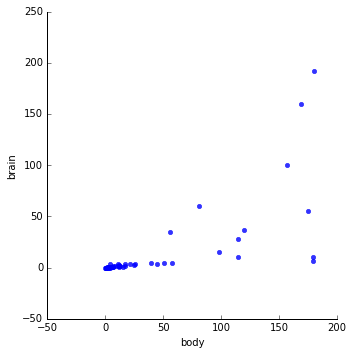

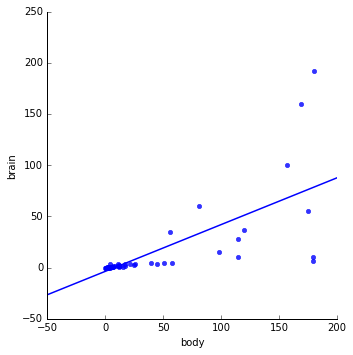

In [156]:
# Let's create a scatterplot
sns.lmplot(x='body', y='brain', data=df, ci=None, fit_reg=False)
# sns.xlim(-10, 200)
# sns.ylim(-10, 250)
sns.lmplot(x='body', y='brain', data=df, ci=None)
# sns.plt.xlim(-10, 200)
# sns.plt.ylim(-10, 250)

In [157]:
# set a random seed for reproducibility
np.random.seed(1)
# randomly assign every row to either sample 1 or sample 2
df['sample'] = np.random.randint(1, 3, len(df))
df.head()

,brain,body,sample
id,,,
1,3.385,44.5,2
2,0.480,15.5,2
3,1.350,8.1,1
5,36.330,119.5,1
6,27.660,115.0,2


In [158]:
# Compare the two samples, they are fairly different!
df.groupby('sample')[['brain', 'body']].mean()

,brain,body
sample,,
1,14.090042,39.924583
2,15.835481,41.597407


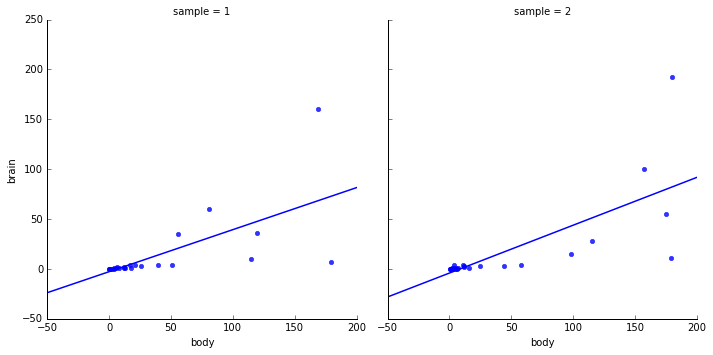

In [159]:
# col='sample' subsets the data by sample and creates two
# separate plots
sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample')
# sns.plt.xlim(-10, 200)
# sns.plt.ylim(-10, 250)

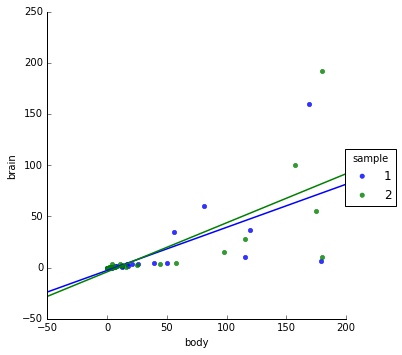

In [160]:
sns.lmplot(x='body', y='brain', data=df, ci=None, hue='sample')

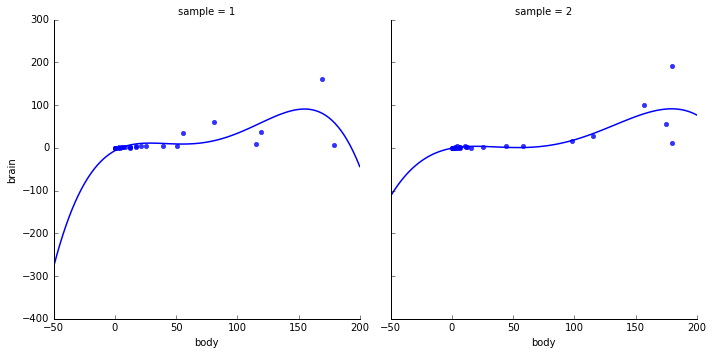

In [161]:
# What would a low bias, high variance model look like? Let's try polynomial regression, with an fourth order polynomial:
sns.lmplot(x='body', y='brain', data=df, ci=None,col='sample', order=4)
# sns.plt.xlim(-10, 200)
# sns.plt.ylim(-10, 250)

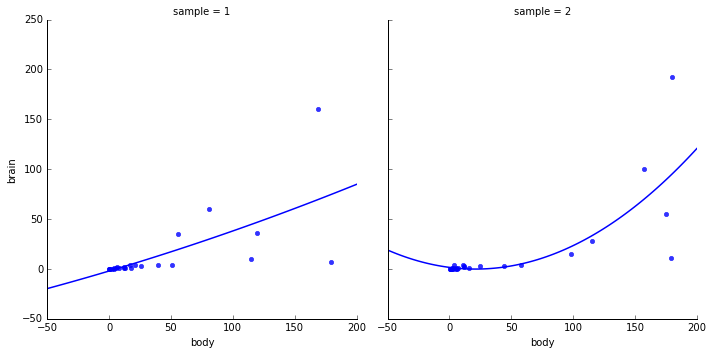

In [162]:
# Let's try a second order polynomial instead:
sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample',order=2)

In [163]:
from sklearn.neighbors import KNeighborsClassifier
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [164]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
knn.score(X, y)

1.0

# K-Fold Cross Validation

In [186]:
from sklearn.cross_validation import KFold
df = pd.read_table('/sasdata/corpid/a589565/Reinforcement Learning/Data_Science_Bootcamp_Codes/Data/brain_body_weight_data.csv', sep=',',names=['id','brain','body'], index_col='id')
# df.head()
df = df[df.brain < 300][df.body < 500]

/aaescore_home/client_software/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [187]:
df.shape

(56, 2)

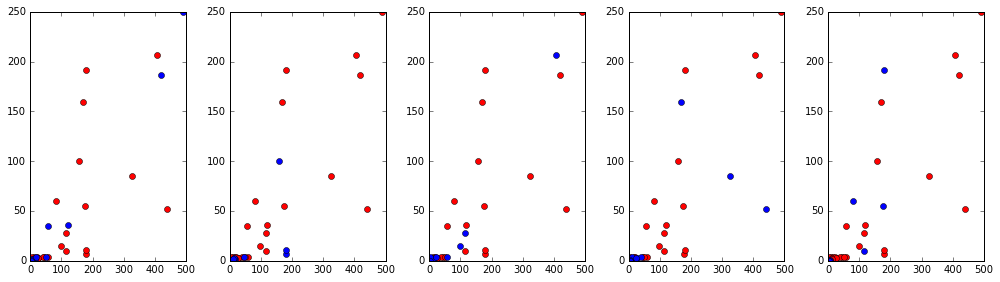

In [188]:
# limit points for visibility
import matplotlib.pyplot as plt
%matplotlib inline
nfolds = 5
fig, axes = plt.subplots(1, nfolds, figsize=(14,4))
for i, fold in enumerate(KFold(len(df), n_folds=nfolds,
                               shuffle=True)):
    training, validation = fold
    x, y = df.iloc[training]['body'], df.iloc[training]['brain']
    axes[i].plot(x, y, 'ro')
    x, y = df.iloc[validation]['body'], df.iloc[validation]['brain']
    axes[i].plot(x, y, 'bo')
plt.tight_layout()

In [189]:
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [190]:
# Using a training set and test set is so important
# Just as important is cross validation. Remember cross validation
# is using several different train test splits and
# averaging your results!
## CROSS-VALIDATION
# check CV score for K=1
from sklearn.cross_validation import cross_val_score, train_test_split
tree = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
scores.mean()
# 0.95999999999

0.72666666666666668

In [191]:
tree

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [192]:
# check CV score for K=5
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores
np.mean(scores)
0.97333333

0.97333333

In [193]:
# search for an optimal value of K
k_range = range(1,20, 2) # [1, 3, 5, 7, …, 27, 29]
errors = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # instantiate a KNN with k neighbors
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    # get our five accuracy scores
    accuracy = np.mean(scores)
    # average them together
    error = (1-accuracy)
    # get our error, which is 1 minus the accuracy
    errors.append(error)
    # keep track of a list of errors

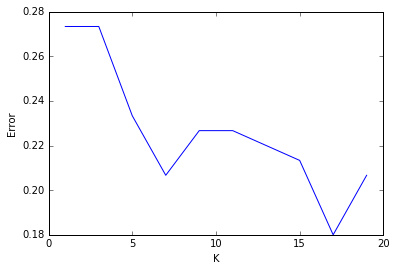

In [194]:
# plot the K values (x-axis) versus the 5-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, errors)
plt.xlabel('K')
plt.ylabel('Error')

# Grid -Searching

In [195]:
from sklearn.grid_search import GridSearchCV
# import our grid search module
knn = KNeighborsClassifier()
# instantiate a blank slate KNN, no neighbors
k_range = range(1, 30, 2)
param_grid = dict(n_neighbors=k_range)
# param_grid = {"n_ neighbors": [1, 3, 5, …]}
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

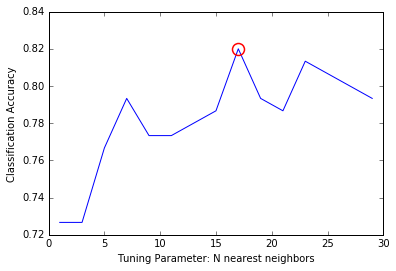

In [196]:
# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
# this is a list of the average accuracies for each parameter
# combination
plt.figure()
# plt.ylim([0.9, 1])
plt.xlabel('Tuning Parameter: N nearest neighbors')
plt.ylabel('Classification Accuracy')
plt.plot(k_range, grid_mean_scores)
plt.plot(grid.best_params_['n_neighbors'], grid.best_score_, 'ro',markersize=12, markeredgewidth=1.5,markerfacecolor='None', markeredgecolor='r')

In [197]:
print(grid.best_params_)
# {'n_neighbors': 7}
print(grid.best_score_)

{'n_neighbors': 17}
0.82


In [198]:
grid.best_estimator_
# actually returns the unfit model with the best parameters
# KNeighborsClassifier(algorithm='auto', leaf_size=30,metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=7, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [199]:
knn = KNeighborsClassifier()
k_range = range(1, 30)
algorithm_options = ['kd_tree', 'ball_tree', 'auto', 'brute']
p_range = range(1, 8) # Distance measure as 2 would mean using standard distance
weight_range = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_range,
algorithm=algorithm_options, p=p_range)
# trying many more options
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'p': [1, 2, 3, 4, 5, 6, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['kd_tree', 'ball_tree', 'auto', 'brute'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [180]:
grid.best_score_

0.8266666666666667

In [181]:
grid.best_params_

{'algorithm': 'brute', 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}

# Visualizing Training Error VS Cross-Validation Error

In [182]:
# This function uses a numpy polynomial fit function to
# calculate the RMSE of given X and y
def rmse(x, y, coefs):
    yfit = np.polyval(coefs, x)
    rmse = np.sqrt(np.mean((y - yfit) ** 2))
    return rmse

In [183]:
xtrain, xtest, ytrain, ytest = train_test_split(df['body'],df['brain'])

In [184]:
train_err = []
validation_err = []
degrees = range(1, 8)
for i, d in enumerate(degrees):
    p = np.polyfit(xtrain, ytrain, d)
# built in numpy polynomial fit function
    train_err.append(rmse(xtrain, ytrain, p))
    validation_err.append(rmse(xtest, ytest, p))

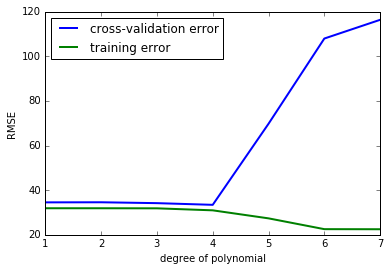

In [149]:
fig, ax = plt.subplots()
# begin to make our graph
ax.plot(degrees, validation_err, lw=2, label = 'cross-validation error')
ax.plot(degrees, train_err, lw=2, label = 'training error')
# Our two curves, one for training error, the other for cross validation
ax.legend(loc=0)
ax.set_xlabel('degree of polynomial')
ax.set_ylabel('RMSE')